# Arboles de decisión

Este notebook realiza un análisis EDA y determina si el paciente tiene o no Diabetes

## 1. Importar librerías necesarias

Importamos las librerías principales para análisis y visualización de datos.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer


## 2. Carga e inspección inicial de los datos

Cargamos el archivo CSV y mostramos las primeras y últimas filas para una vista preliminar.

In [ ]:
df = pd.read_csv("../data/raw/diabetes dtree.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


## 3. Tamaño y estructura del dataset

Mostramos el número de filas y columnas, y la estructura general del DataFrame.

In [ ]:
df.shape

(768, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## 4. Tipos de datos y valores nulos

Revisamos los tipos de datos de cada columna y verificamos la existencia de valores nulos o faltantes.

In [ ]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

### Valores nulos

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [25]:
print((df == 0).sum())

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


### Mostrar los valores únicos de todas las columnas

In [ ]:
for col in df.columns:
    print(f"{col}: {df[col].unique()}\n")

Pregnancies: [ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]

Glucose: [148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]

BloodPressure: [ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]

SkinThickness: [35 29  0 23 32 45 19 47 38 30 41 33 26 15 36 11 31 37 42 25 18 24 39 27
 21 34 10 60 13 20 22 28 54 40 51 56 14 17 50 44 12 46 16  7 52 43 48  8
 

## 5. Estadísticas descriptivas

Obtenemos estadísticas descriptivas de las variables numéricas.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


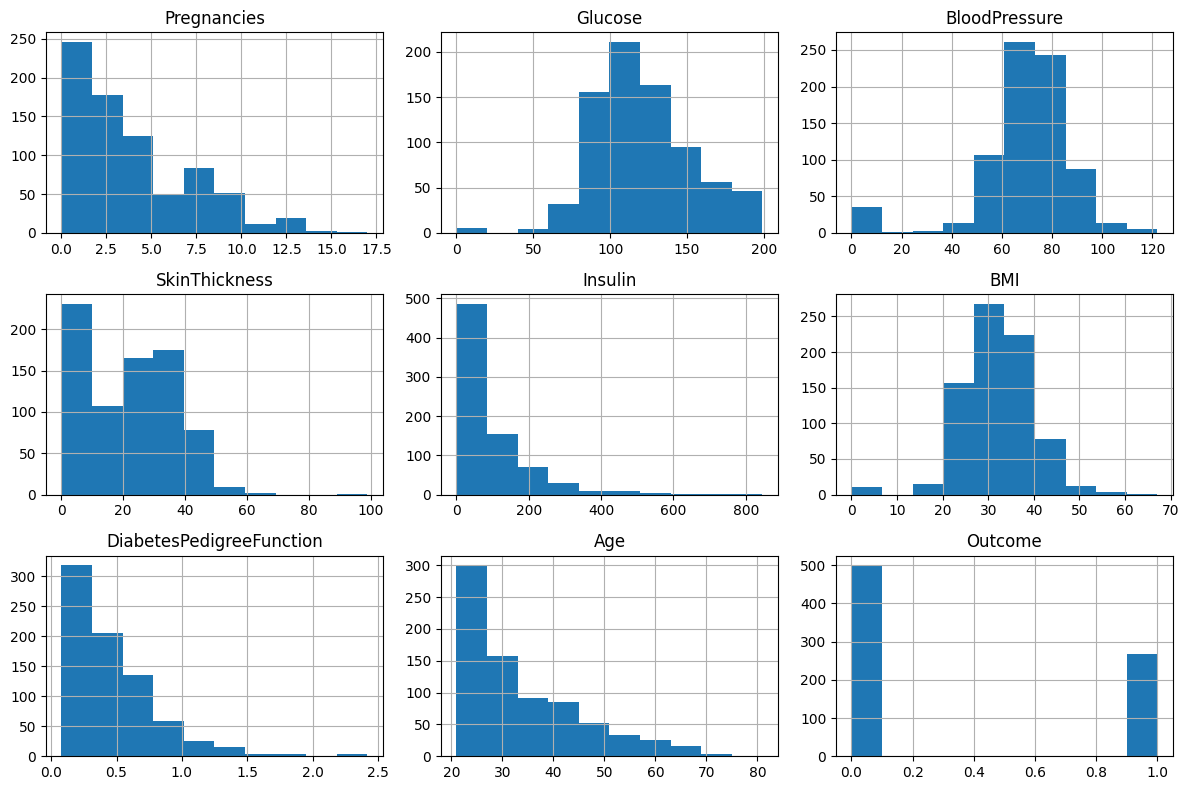

In [14]:
df.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

### Correlación entre variables numéricas

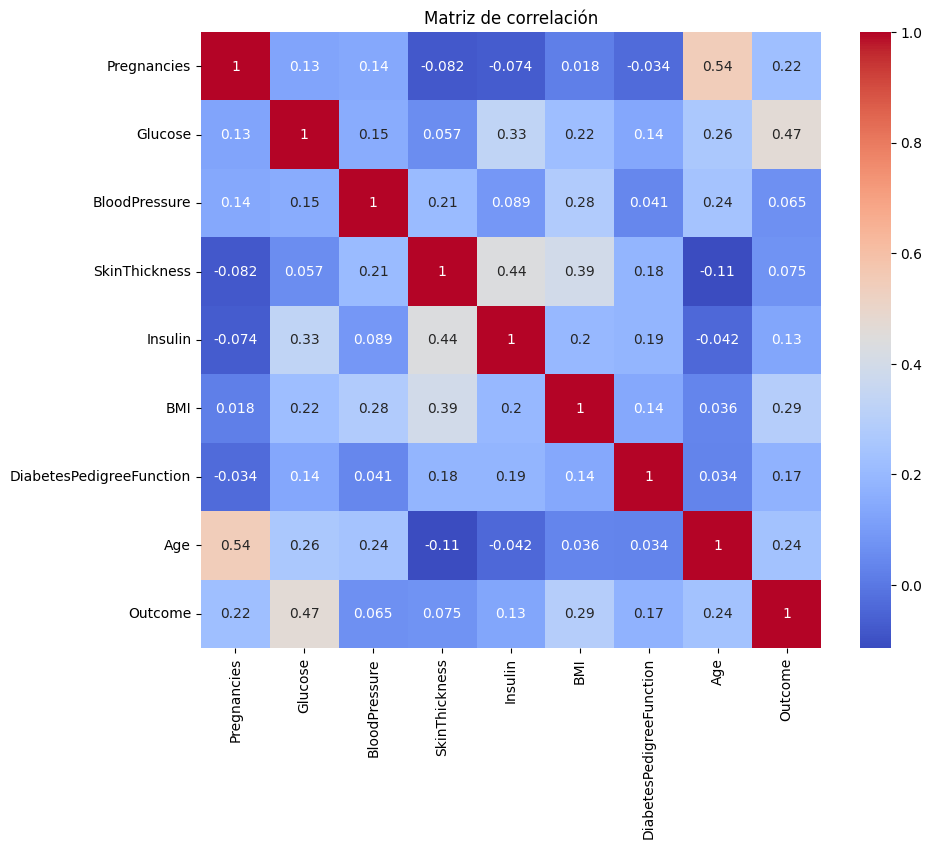

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

### Identificación de outliers

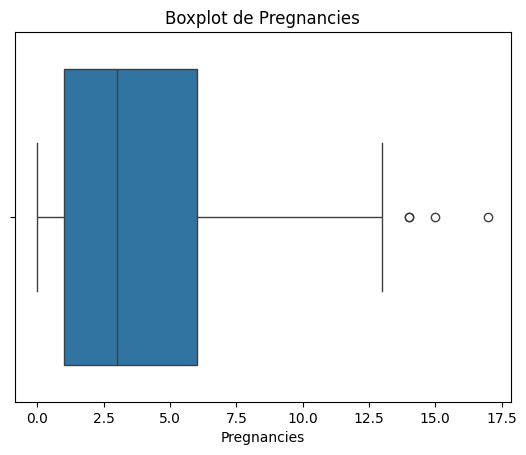

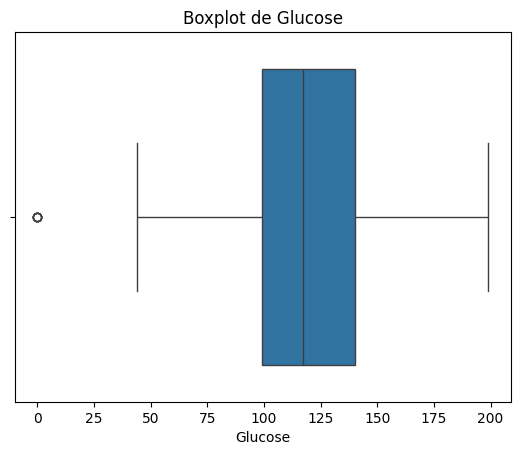

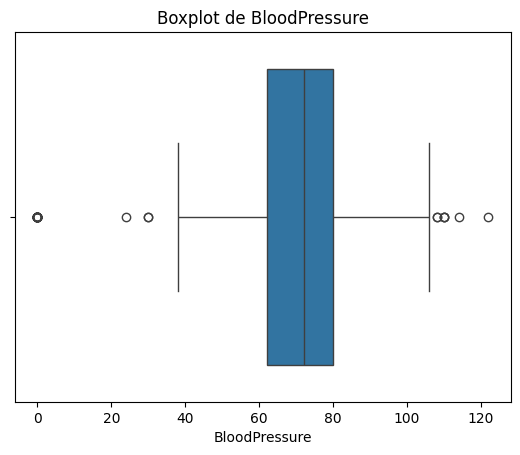

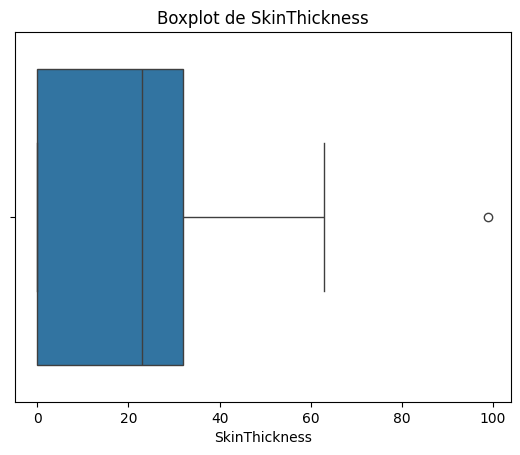

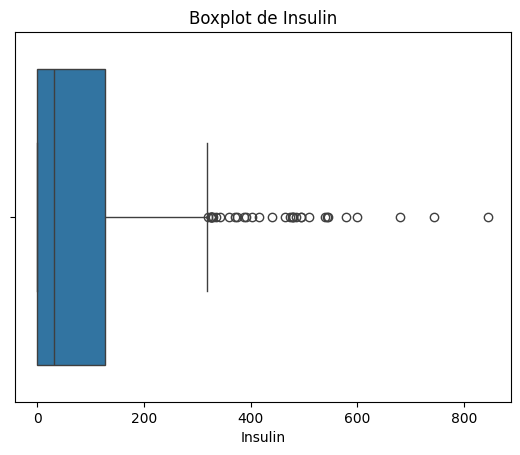

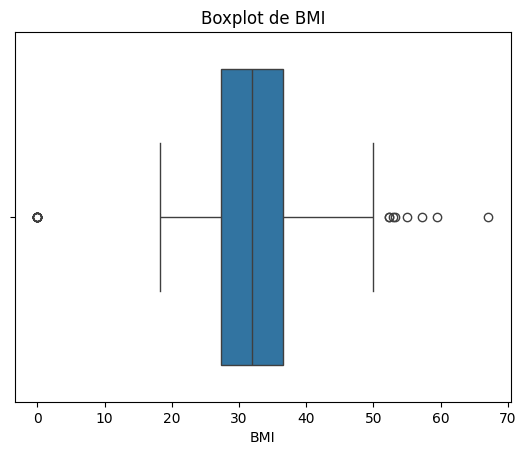

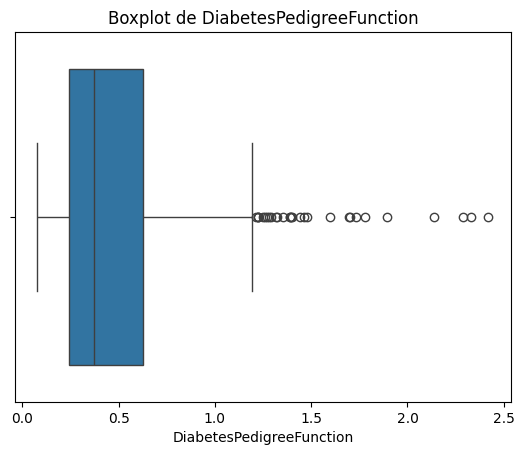

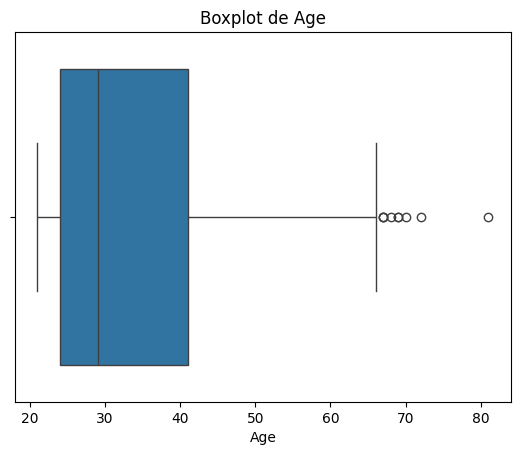

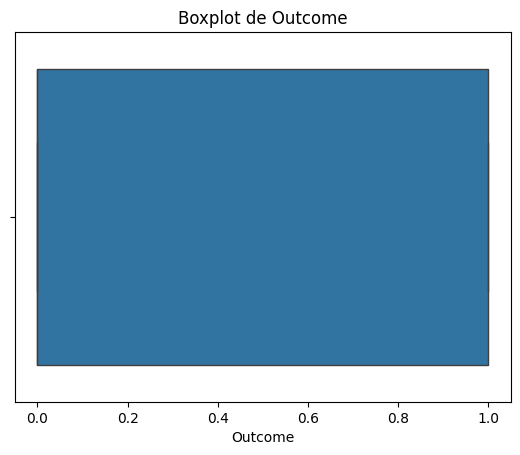

In [16]:
for col in df.select_dtypes(include=np.number).columns:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

## Elegimos Outcome como variable objetivo

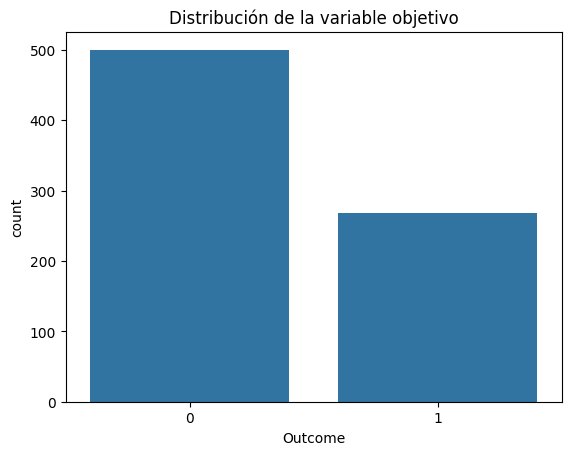

In [17]:
sns.countplot(x='Outcome', data=df)
plt.title('Distribución de la variable objetivo')
plt.show()

### Relación entre variables y variable objetivo

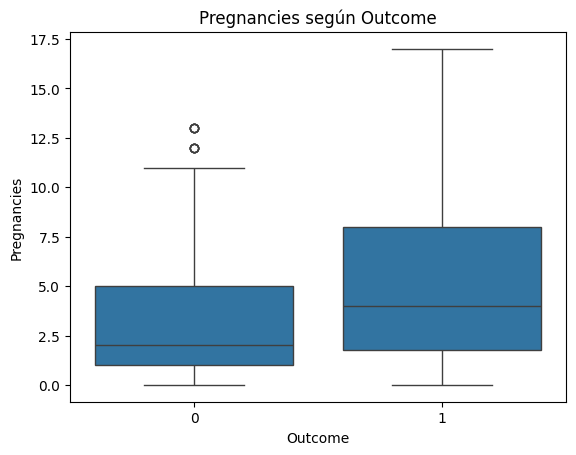

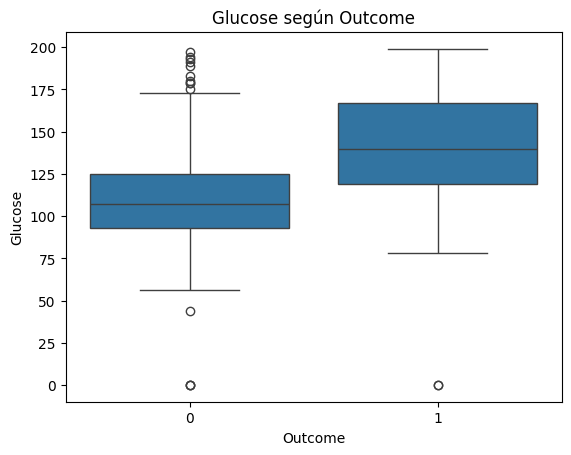

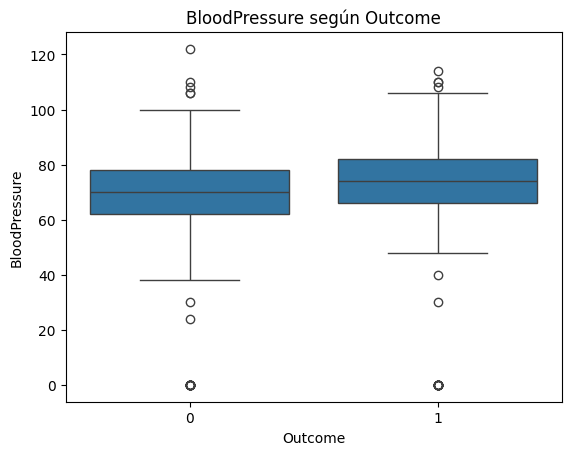

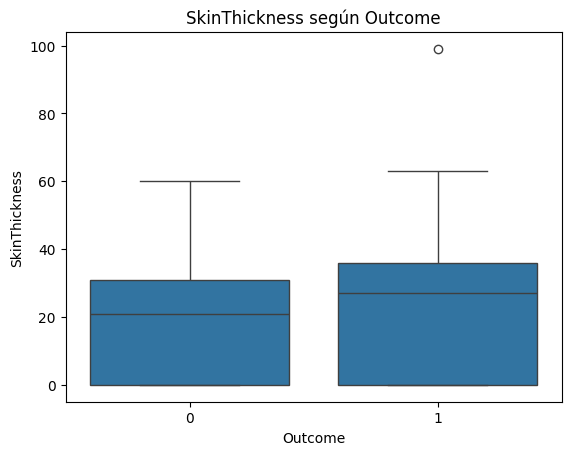

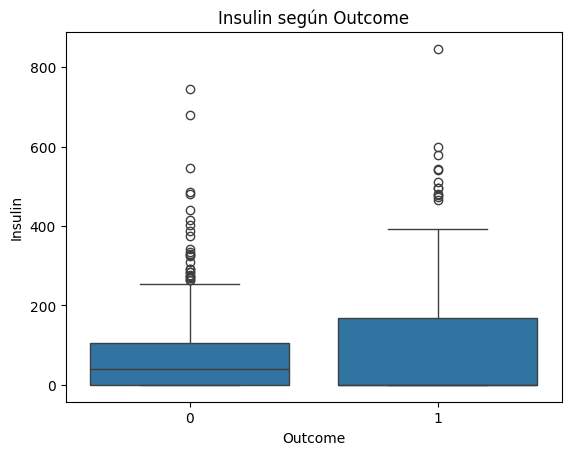

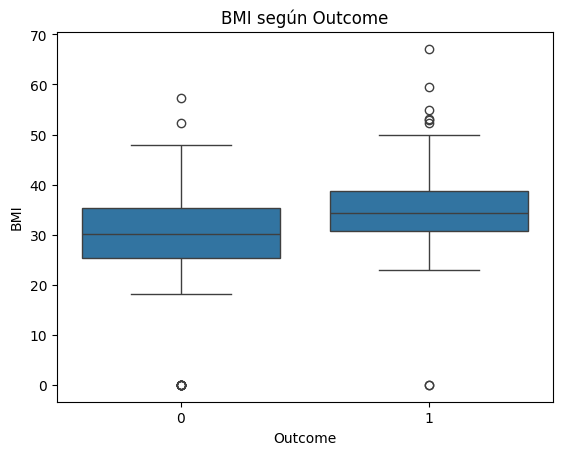

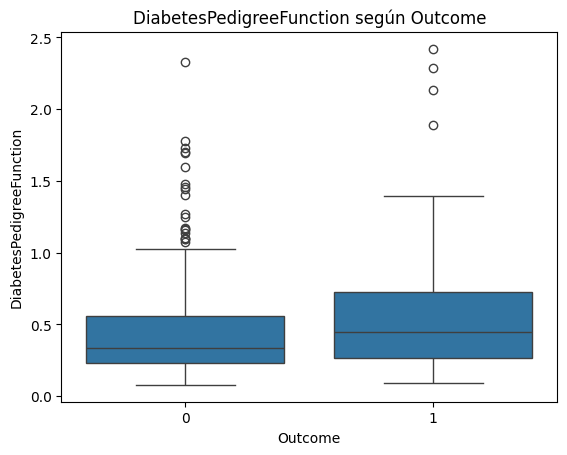

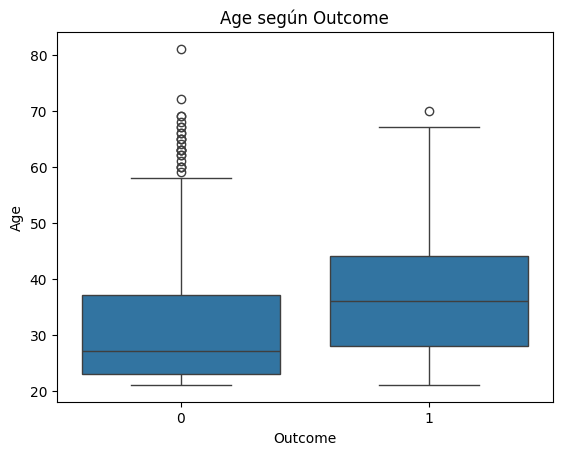

In [18]:
for col in df.select_dtypes(include=np.number).columns:
    if col != 'Outcome':
        plt.figure()
        sns.boxplot(x='Outcome', y=col, data=df)
        plt.title(f'{col} según Outcome')
        plt.show()

### Identificación de variables altamente correlacionadas

> Enlistamos descendientemente la correlación con Outcome de cada variable

In [22]:
corr_outcome = df.corr()['Outcome'].drop('Outcome').abs().sort_values(ascending=False)
corr_outcome

Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

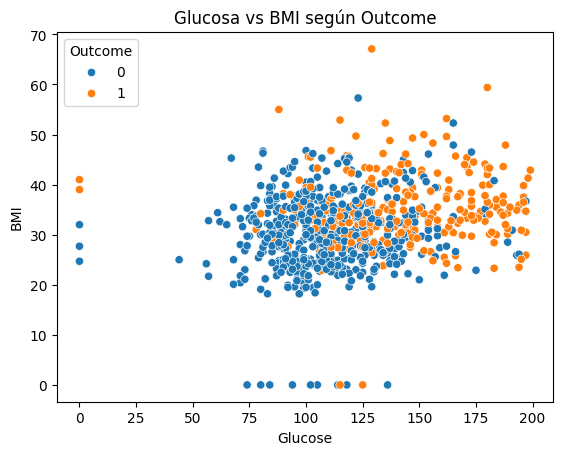

In [19]:
sns.scatterplot(x='Glucose', y='BMI', hue='Outcome', data=df)
plt.title('Glucosa vs BMI según Outcome')
plt.show()

##### Podemos concluir que los pacientes con alta glucosa y alto bmi tienen tendecia a tener diabetes

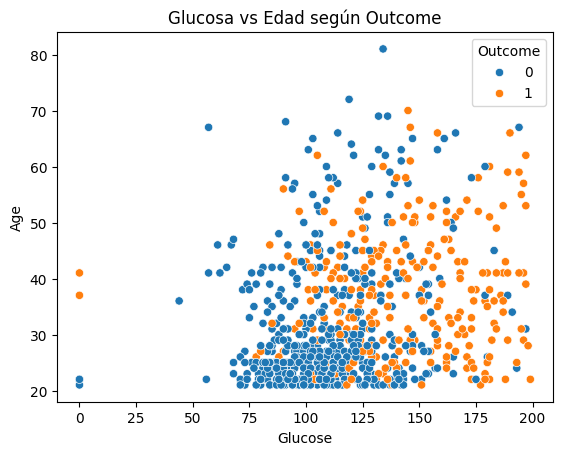

In [23]:
sns.scatterplot(x='Glucose', y='Age', hue='Outcome', data=df)
plt.title('Glucosa vs Edad según Outcome')
plt.show()

##### Las edades menores a 30 y con glucosa entre 75 y 150 no padecen diabetes. Mayores a 30 y >125 de glucosa presentan una alta probabilidad.

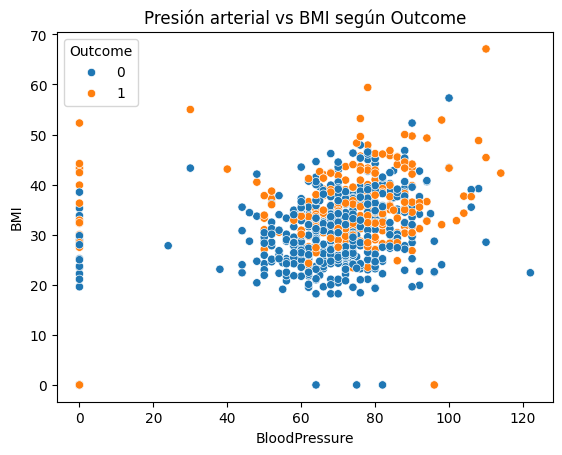

In [24]:
sns.scatterplot(x='BloodPressure', y='BMI', hue='Outcome', data=df)
plt.title('Presión arterial vs BMI según Outcome')
plt.show()

##### Pacientes con mayor BMI tienen mayor probabilidad de tener diabetes, independientemente de su presión arterial. La presión arterial no parece ser un factor tan determinante como el BMI.

## De acuerdo al dataset tenemos variables con valor 0 que no están correctos. Reemplazaremos por la moda y por KNN. Tendremos 2 datasets adicionales y generaremos 3 arboles de decisión.

### Método KNN

In [31]:
cols_con_ceros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_con_ceros] = df[cols_con_ceros].replace(0, np.nan)

imputer = KNNImputer(n_neighbors=5)
df[cols_con_ceros] = imputer.fit_transform(df[cols_con_ceros])
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,209.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,73.0,26.6,0.351,31,0
2,8,183.0,64.0,29.4,383.2,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,213.4,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,20.6,180.8,30.1,0.349,47,1


#### Confirmamos que ya no tenemos 0 en las columnas

In [34]:
print((df == 0).sum())


Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


### Generamos un nuevo Heatmap

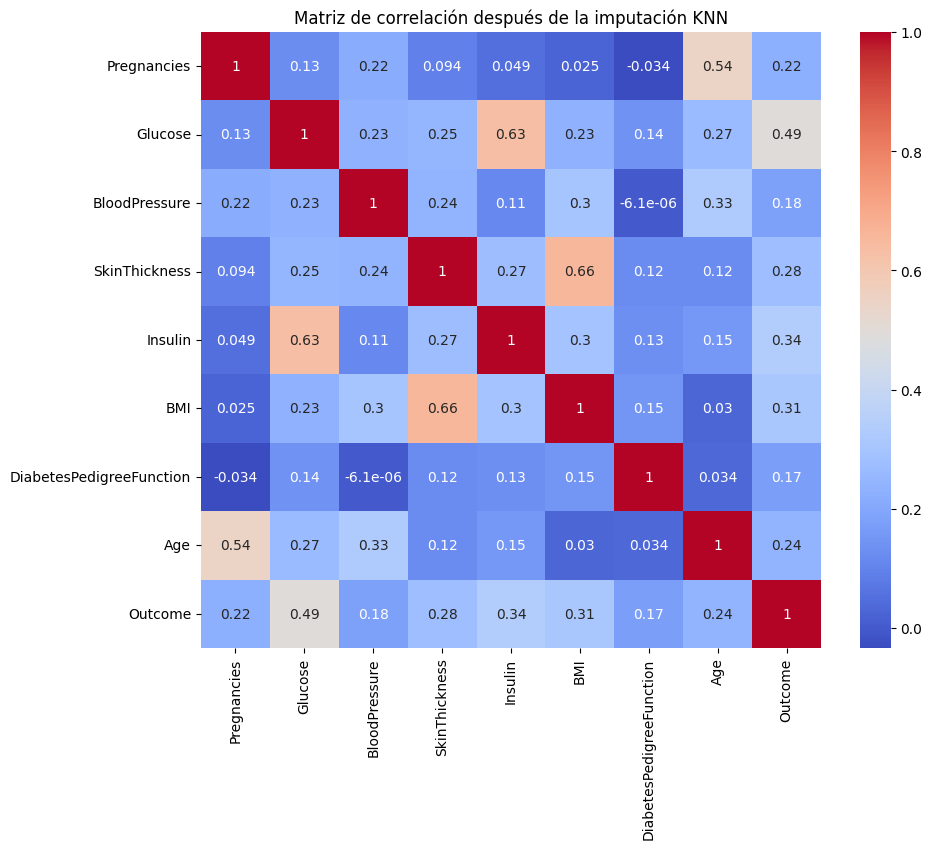

In [35]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de correlación después de la imputación KNN')
plt.show()